In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [2]:
#Configure the output
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10
sb.set_style("whitegrid")

In [3]:
iris = datasets.load_iris()
#scale the data
data = scale(iris.data)
target = pd.DataFrame(iris.target)
variable_names = iris.feature_names
data[0:10]

array([[-0.9007,  1.019 , -1.3402, -1.3154],
       [-1.143 , -0.132 , -1.3402, -1.3154],
       [-1.3854,  0.3284, -1.3971, -1.3154],
       [-1.5065,  0.0982, -1.2834, -1.3154],
       [-1.0218,  1.2492, -1.3402, -1.3154],
       [-0.5372,  1.9398, -1.1697, -1.0522],
       [-1.5065,  0.7888, -1.3402, -1.1838],
       [-1.0218,  0.7888, -1.2834, -1.3154],
       [-1.7489, -0.3622, -1.3402, -1.3154],
       [-1.143 ,  0.0982, -1.2834, -1.4471]])

In [12]:
# There are three ways you can link the data points Ward, Complete and Average. 
# In my case, I am using ward linkage parameter. It’s just for the visualizing the dendrogram. But at the last, 
# you will take the distance metrics and linkage parameters on the accuracy score of the model.

#‘ward’ minimizes the variance of the clusters being merged.

#‘average’ uses the average of the distances of each observation of the two sets.

#‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

#‘single’ uses the minimum of the distances between all observations of the two sets.

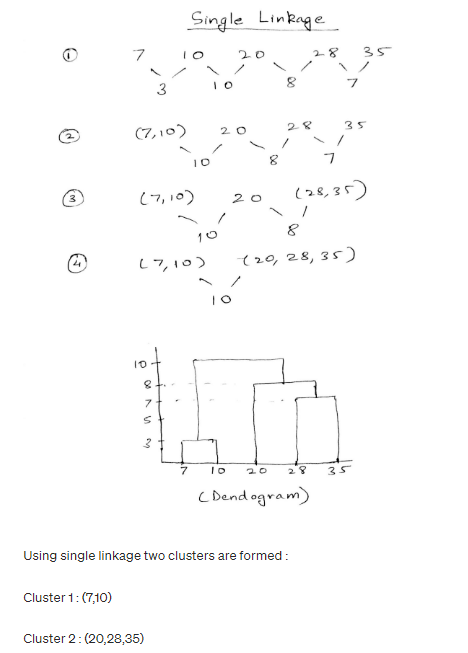

In [11]:
# Try it with "ward", "complete" and "average" and check the score

#based on the dendrogram we have two clusetes 
k =3 

#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="average")

#fit the model on the dataset
HClustering.fit(data)

#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.6866666666666666

In [6]:
# In order to estimate the number of centroids. You should verify the number of clusters visually. 
# In this case, you will use the dendrogram.  Use the following code.

z = linkage(data,"ward")

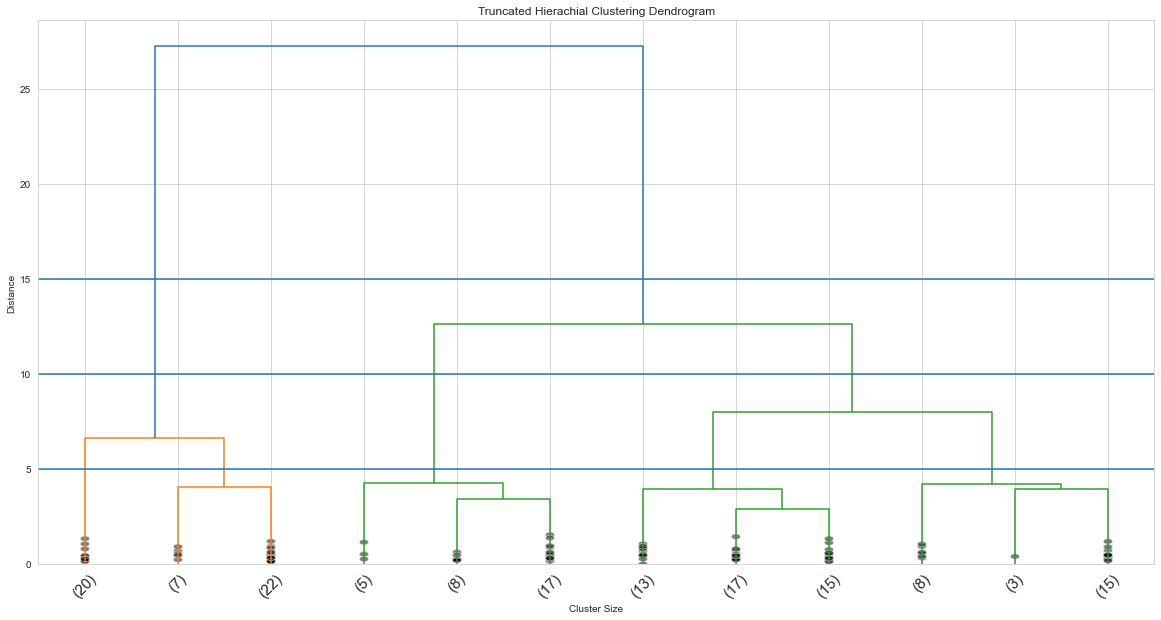

In [7]:
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [13]:
################################################################################################################################

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

In [15]:
X = X[:50, :]

In [16]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [17]:
model = model.fit(X)

In [21]:
# Number of clusters
print(model.n_clusters_)

# Distances between clusters
distances = model.distances_
print(distances)

50
[0.1    0.1    0.1    0.1    0.1414 0.1414 0.1414 0.1414 0.1414 0.1414
 0.1414 0.1732 0.1732 0.1826 0.2    0.2082 0.216  0.216  0.2582 0.2757
 0.2828 0.2944 0.2944 0.3136 0.3146 0.3162 0.3317 0.3367 0.3464 0.3697
 0.4062 0.4223 0.4397 0.4397 0.4673 0.5477 0.5944 0.6245 0.6364 0.6627
 0.7763 0.8187 0.8556 0.91   1.1051 1.254  1.3713 1.9188 3.8281]


In [22]:
distances.min()

0.09999999999999964

In [23]:
distances.max()

3.828052620290243

In [26]:
# Scikit learn does not provide dendrograms so we will use the dendrogram of SciPy package.

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [25]:
# We first create a linkage matrix:

Z = hierarchy.linkage(model.children_, 'ward')

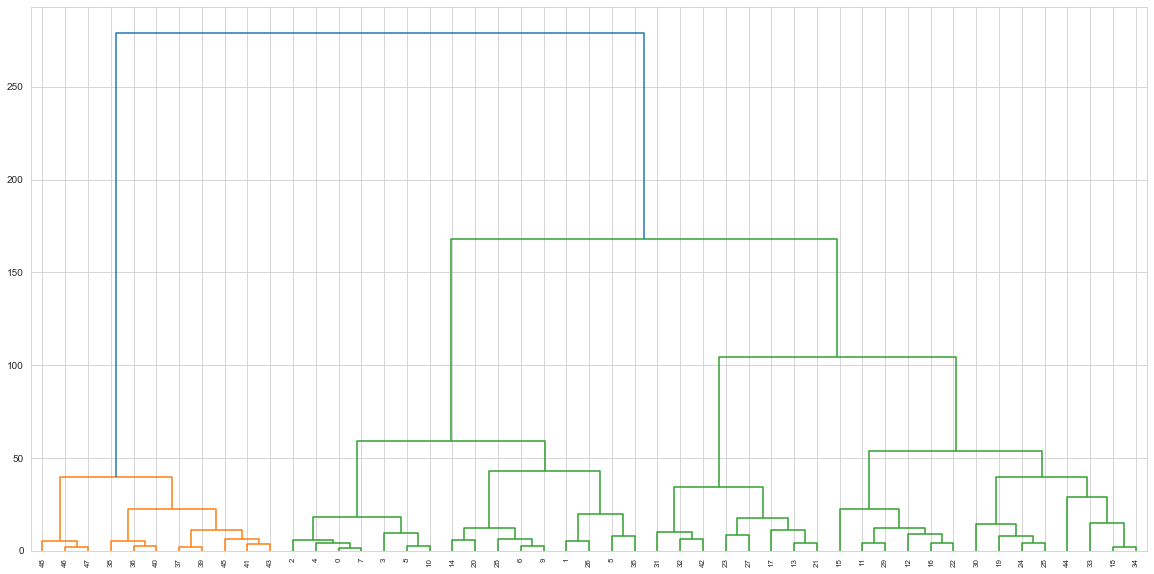

In [27]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [28]:
#We can control the number of cluster by adjusting distance_thresold or n_cluster parameters. Let’s check the calculated distances between clusters:

model.distances_

array([0.1   , 0.1   , 0.1   , 0.1   , 0.1414, 0.1414, 0.1414, 0.1414,
       0.1414, 0.1414, 0.1414, 0.1732, 0.1732, 0.1826, 0.2   , 0.2082,
       0.216 , 0.216 , 0.2582, 0.2757, 0.2828, 0.2944, 0.2944, 0.3136,
       0.3146, 0.3162, 0.3317, 0.3367, 0.3464, 0.3697, 0.4062, 0.4223,
       0.4397, 0.4397, 0.4673, 0.5477, 0.5944, 0.6245, 0.6364, 0.6627,
       0.7763, 0.8187, 0.8556, 0.91  , 1.1051, 1.254 , 1.3713, 1.9188,
       3.8281])

In [29]:
model = AgglomerativeClustering(distance_threshold=0.8, n_clusters=None)
model = model.fit(X)
model.n_clusters_

9

Distances are in ascending order. If we can set the distance_thresold as 0.8, number of clusters will be 9. There are 8 distances greated than 0.8 so, when combined, 9 clusters will be formed.